# 3.2) 비트코인 시세 예측하기

### 바로가기

- [<Step1. 탐색> : 시간정보가 포함된 데이터 살펴보기](#<Step1.-탐색>-:-시간정보가-포함된-데이터-살펴보기)
    - [market price 데이터셋의 기본 정보]
    - [시계열 데이터 살펴보기]
- [<Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측](#<Step2.-예측>-:-파이썬-라이브러리를-활용한-시세-예측)
    - [ARIMA 모델 활용하기]
    - [Facebook Prophet 활용하기]
- [<Step3. 활용> : 더 나은 결과를 위한 방법들](#<Step3.-활용>-:-더-나은-결과를-위한-방법들)
    - [상한가 및 하한가 선정]
    - [이상치 제거하기]
    - [하이퍼 파라미터 선정하기]
- [재미로 알아보는 내일의 비트코인 시세](#재미로-알아보는-내일의-비트코인-시세)

-----

# <Step1. 탐색> : 시간정보가 포함된 데이터 살펴보기

### [market price 데이터셋의 기본 정보]

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path="../python-data-analysis-master/data/market-price.csv"

bitcoin_df=pd.read_csv(file_path, names=['day','price'])

In [23]:
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [24]:
print(bitcoin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [25]:
print(bitcoin_df.tail())

                     day        price
360  2018-08-22 00:00:00  6575.229167
361  2018-08-23 00:00:00  6434.881667
362  2018-08-24 00:00:00  6543.645714
363  2018-08-25 00:00:00  6719.429231
364  2018-08-26 00:00:00  6673.274167


In [26]:
# day 데이터 프레임의 index로 설정합니다.
bitcoin_df.index=bitcoin_df["day"]
bitcoin_df.set_index("day",inplace=True)
print(bitcoin_df.head())

                           price
day                             
2017-08-27 00:00:00  4354.308333
2017-08-28 00:00:00  4391.673517
2017-08-29 00:00:00  4607.985450
2017-08-30 00:00:00  4594.987850
2017-08-31 00:00:00  4748.255000


In [27]:
print(bitcoin_df.describe())

              price
count    365.000000
mean    8395.863578
std     3239.804756
min     3319.630000
25%     6396.772500
50%     7685.633333
75%     9630.136277
max    19498.683333


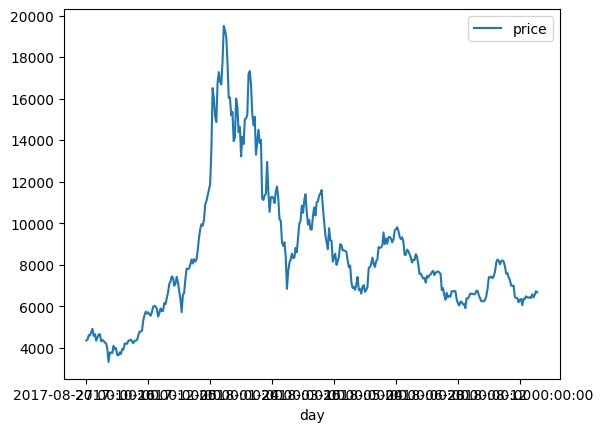

In [28]:
# 일자별 비트코인 시세를 시각화 합니다.
bitcoin_df.plot()
plt.show()

-----

# <Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측

### [ARIMA 모델 활용하기]

###### ARIMA 모델 학습

In [29]:
# ARIMA 모델 활용하기위한 모듈 추가
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2)파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


-----

###### 모델의 성능 & 예측 결과 시각화
- 학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화합니다.